In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
import datetime
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
pd.set_option('display.max_columns', None)

In [2]:
# Cargamos los datos
file = "Informacion Puerto Angamos-Revisado-Fechas 2020-2022.xlsx"
df = pd.read_excel(file)
df.shape

(7233, 39)

In [3]:
#  & df["Hora Legada a Espera"].notna()
df_ss = df[df["Producto"].notna() & df["Hora Ingreso a Puerto"].notna()]
df_ss.shape

(6487, 39)

In [4]:
df_ss.columns

Index(['Flota', 'Patente', 'Tipo', 'N Guia', 'Fecha', 'Producto', 'Viaje',
       'Origen', 'Origen inicio', 'Origen salida', 'Destino',
       'Destino termino', 'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto',
       'Tiempo total Descarga', 'Nombre Cancha', 'Nombre Geo Espera Exterior',
       'Fecha Guía', 'Hora Guía', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

In [5]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'QROP-KS', 'ULTRASOL NKS',
       'SSR-C | SSR-C | SSR-C', 'LSI (S)', 'LSI (S) | LSI (S)'],
      dtype=object)

In [6]:
cols = ["Producto",'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto']

In [7]:
df_ss = df_ss[cols]

In [8]:
df_ss = df_ss[(df_ss["Producto"].str.contains("SSR")) | (df_ss["Producto"].str.contains("NPC"))]

In [9]:
df_ss[df_ss["Tiempo Espera [minutos]"].notna()].shape[0], df_ss.shape[0]

(5684, 5684)

In [10]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'SSR-C | SSR-C | SSR-C'], dtype=object)

In [11]:
df_ss["Hora Ingreso a Puerto"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"])

In [12]:
df_espera = df_ss[df_ss["Hora Legada a Espera"].notna() & df_ss["Tiempo Espera [minutos]"].notna()]

In [13]:
df_espera.shape

(5679, 5)

In [14]:
import datetime as td
def Minutos_Sobrantes(t):
    if t.time() < td.time(8,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(14,0,0):
        return 0.
    elif t.time() < td.time(15,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 15, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(22,30,0):
        return 0.
    else:
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0) + td.timedelta(days=1)
        dt = (t_aux - t).total_seconds()/60.
        return dt

In [15]:
df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])

<ipython-input-15-d9d185a0ea9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])


In [16]:
df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))

<ipython-input-16-c9a0c46d32fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))


In [17]:
df_espera["Tiempo Espera Limpio Aux"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]

<ipython-input-17-5d39cea270a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio Aux"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]


In [18]:
def Correccion(te, tp):
    dt = (tp-te).total_seconds()/60.
    return dt

In [19]:
df_espera["Tiempo Espera Limpio"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio Aux"] if x["Tiempo Espera Limpio Aux"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)

<ipython-input-19-a4abe4a0791f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio"] = df_espera.apply(lambda x: x["Tiempo Espera Limpio Aux"] if x["Tiempo Espera Limpio Aux"]>0 else Correccion(x["Hora Legada a Espera"], x["Hora Ingreso a Puerto"]), axis = 1)


In [20]:
T_espera = df_espera["Tiempo Espera Limpio"]
T_espera.max()

1756.9

In [21]:
Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(15*118)
h, b = np.histogram(T_espera, bins=Bins)

In [22]:
bins = []
for i in range(len(b[:-5])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-30h"])
bins

array(['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105',
       '105-120', '120-135', '135-150', '150-165', '165-180', '180-195',
       '195-210', '210-225', '225-4h', '4h-8h', '8h-16h', '16h-30h'],
      dtype='<U7')

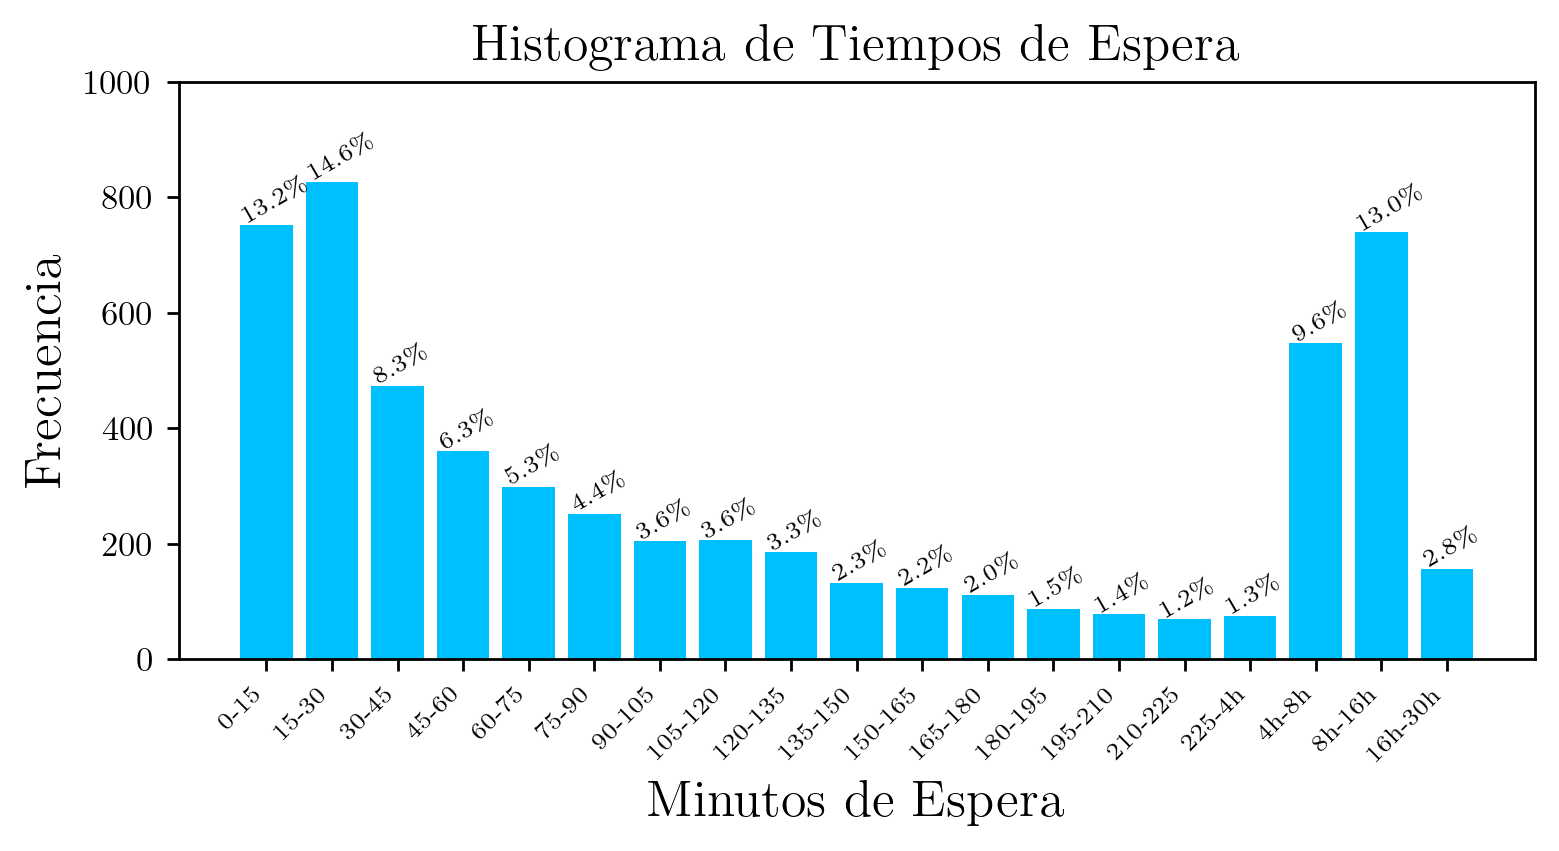

In [23]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,1000])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

In [24]:
df_espera.head(5)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Minutos Sobrantes,Tiempo Espera Limpio Aux,Tiempo Espera Limpio
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,0.0,884.350000,884.350000
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,0.0,891.466667,891.466667
2,NPC-R SOLAR,2020-01-15 20:50:52,884.416667,2020-01-16 11:35:17,70.983333,0.0,884.416667,884.416667
3,NPC-R SOLAR,2020-01-15 21:43:32,834.300000,2020-01-16 11:37:50,130.766667,0.0,834.300000,834.300000
4,NPC-R SOLAR,2020-01-15 20:27:45,103.216667,2020-01-15 22:10:58,31.000000,0.0,103.216667,103.216667


In [25]:
df_espera["Rango Horario en Espera"] = df_espera["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

<ipython-input-25-d27effbf24fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Rango Horario en Espera"] = df_espera["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))


In [26]:
df_espera["Rango Horario en Puerto"] = df_espera["Hora Ingreso a Puerto"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

<ipython-input-26-d4ea57767385>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Rango Horario en Puerto"] = df_espera["Hora Ingreso a Puerto"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))


In [27]:
rangos = [str(i)+"-"+str(i+1) for i in range(24)] 

### 8 - Camiones En Espera Promedio Por Rango Horario

In [28]:
df_espera["Fecha de Ingreso a Espera"] = df_espera["Hora Legada a Espera"].apply(lambda x: x.date())

<ipython-input-28-17b50ff90937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Fecha de Ingreso a Espera"] = df_espera["Hora Legada a Espera"].apply(lambda x: x.date())


In [29]:
df_espera["Fecha de Ingreso a Puerto"] = df_espera["Hora Ingreso a Puerto"].apply(lambda x: x.date())

<ipython-input-29-f1c5e4eeb175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Fecha de Ingreso a Puerto"] = df_espera["Hora Ingreso a Puerto"].apply(lambda x: x.date())


In [60]:
fechas_espera = df_espera["Fecha de Ingreso a Espera"].unique()

In [61]:
rang_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_espera):
        a = df_espera[(df_espera["Fecha de Ingreso a Espera"] == valj) &
                    (df_espera["Rango Horario en Espera"] == vali)].shape[0]
        
        rang_mean[i].append(a)
        
len(rang_mean), len(rangos)

(24, 24)

In [62]:
rango_prom = [np.array(i).mean() for i in rang_mean]
rango_max = [np.array(i).max() for i in rang_mean]

In [63]:
idx = []
rango_prom_aux = []
for i, val in enumerate(rango_prom):
    if val != 0:
        idx.append(i)
        rango_prom_aux.append(val)
rango_prom_aux = np.array(rango_prom_aux)
rango_prom_aux

array([0.42307692, 0.06410256, 0.02136752, 0.01282051, 0.01709402,
       0.00854701, 0.16666667, 0.34615385, 1.02564103, 2.54700855,
       2.46153846, 1.63247863, 1.52136752, 1.55555556, 1.61965812,
       1.14102564, 0.9017094 , 0.98717949, 1.42735043, 1.84188034,
       1.72649573, 1.3034188 , 1.01709402, 0.5       ])

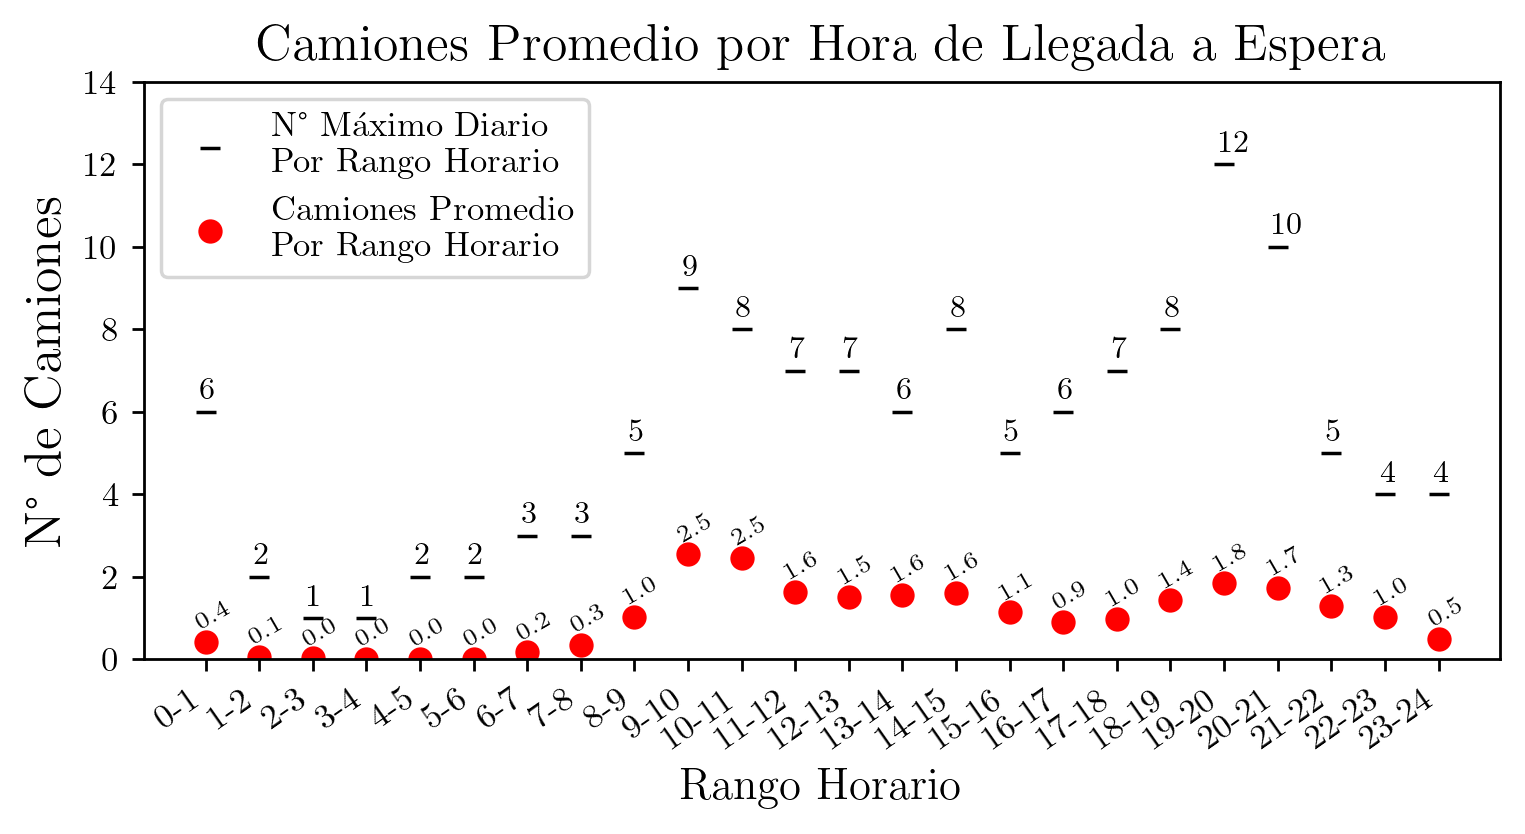

In [73]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.plot(rangos, rango_max, "_k", 
         label = "N° Máximo Diario \n Por Rango Horario")
ax1.set_title("Camiones Promedio por Hora de Llegada a Espera", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,14])


for i, label in enumerate(rango_max):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.1, label+0.3), 
                     fontsize = 9, rotation = 0)
    
#ax2.legend(fontsize = 7)


ax1.plot(idx, rango_prom_aux, "ro", label = "Camiones Promedio \n Por Rango Horario")
ax1.legend(loc = "upper left",fontsize = 10)
#ax2.legend(loc = "upper left",fontsize = 7)


for i, label in enumerate(rango_prom):
    if label != 0:
        plt.annotate(str(round(label,1)), (i-0.25, label+0.3), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Camiones Promedio y Máximo en Espera Por Rango Horario.png", bbox_inches= "tight")

In [74]:
fechas_puerto = df_espera["Fecha de Ingreso a Puerto"].unique()

In [75]:
rang_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_puerto):
        a = df_espera[(df_espera["Fecha de Ingreso a Puerto"] == valj) &
                    (df_espera["Rango Horario en Puerto"] == vali)].shape[0]
        
        rang_mean[i].append(a)
        
len(rang_mean), len(rangos)

(24, 24)

In [76]:
rango_prom = [np.array(i).mean() for i in rang_mean]
rango_max = [np.array(i).max() for i in rang_mean]

In [77]:
idx = []
rango_prom_aux = []
for i, val in enumerate(rango_prom):
    if val != 0:
        idx.append(i)
        rango_prom_aux.append(val)
rango_prom_aux = np.array(rango_prom_aux)
rango_prom_aux

array([2.18584071, 2.11946903, 2.60176991, 2.45132743, 1.70353982,
       1.36725664, 2.05309735, 0.89823009, 2.05309735, 1.76106195,
       1.82300885, 1.82300885, 1.47787611, 0.72566372, 0.07964602,
       0.00442478])

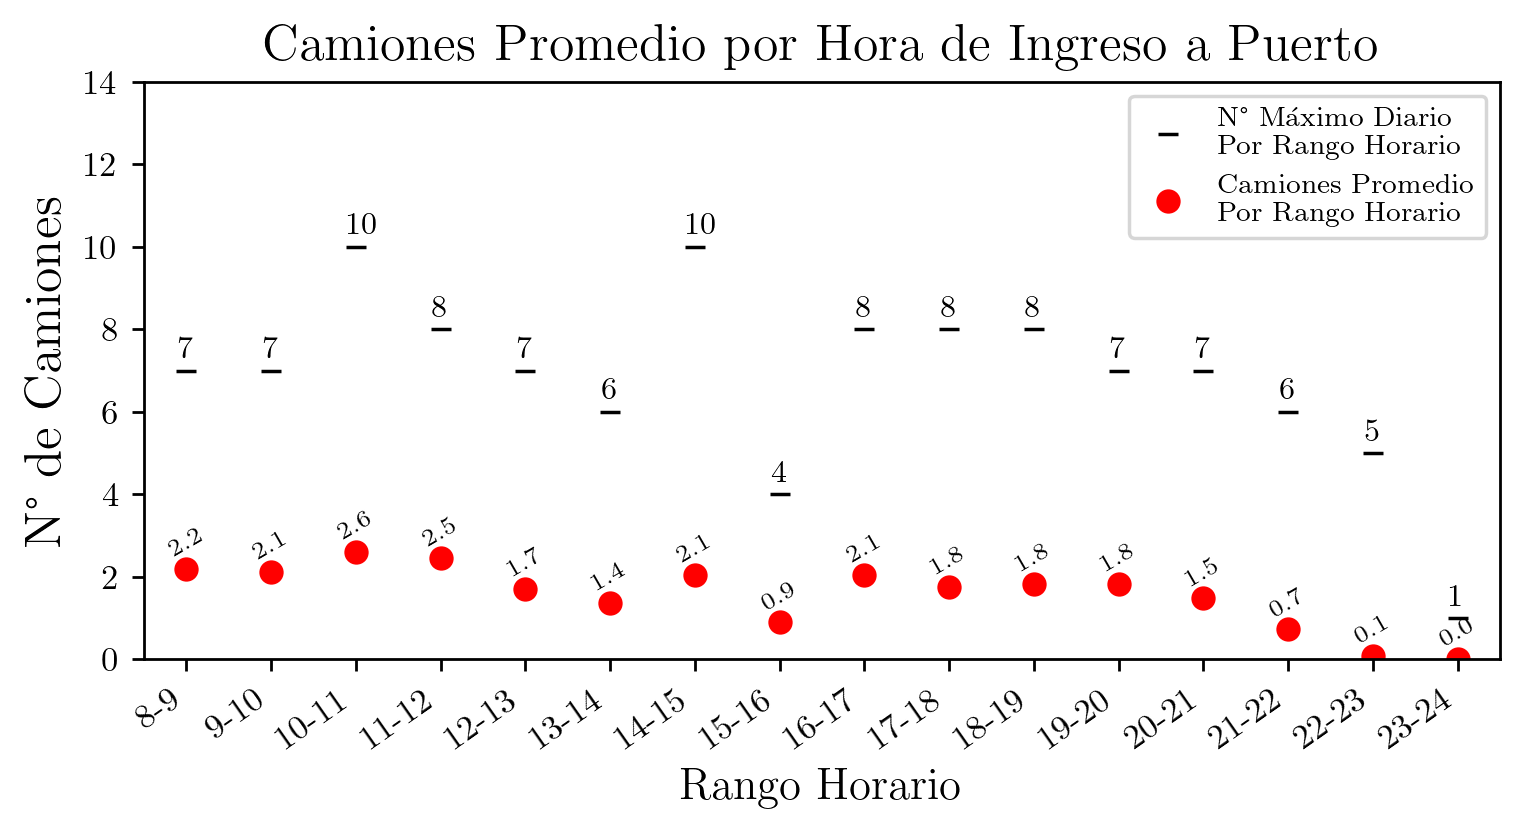

In [89]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.plot(rangos, rango_max, "_k", 
         label = "N° Máximo Diario \n Por Rango Horario")
ax1.set_title("Camiones Promedio por Hora de Ingreso a Puerto", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,14])


for i, label in enumerate(rango_max):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.1, label+0.3), 
                     fontsize = 9, rotation = 0)
    
#ax2.legend(fontsize = 7)


ax1.plot(idx, rango_prom_aux, "ro", label = "Camiones Promedio \n Por Rango Horario")
ax1.legend(loc = "upper right",fontsize = 8)
#ax2.legend(loc = "upper left",fontsize = 7)

ax1.set_xlim([7.5,23.5])
for i, label in enumerate(rango_prom):
    if label != 0:
        plt.annotate(str(round(label,1)), (i-0.25, label+0.3), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Camiones Promedio y Máximo en Puerto Por Rango Horario.png", bbox_inches= "tight")

### Tiempos de Espera Limpios Por Mes

In [90]:
df_espera.head(2)

,Producto,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Minutos Sobrantes,Tiempo Espera Limpio Aux,Tiempo Espera Limpio,Rango Horario en Espera,Rango Horario en Puerto,Fecha de Ingreso a Espera,Fecha de Ingreso a Puerto
0,NPC-R SOLAR,2020-01-15 20:49:19,884.350000,2020-01-16 11:33:40,51.150000,0.0,884.350000,884.350000,20-21,11-12,2020-01-15,2020-01-16
1,NPC-R SOLAR,2020-01-15 20:35:57,891.466667,2020-01-16 11:27:25,34.433333,0.0,891.466667,891.466667,20-21,11-12,2020-01-15,2020-01-16


In [148]:
en_cola = []
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_espera):
        a = df_espera[(df_espera["Fecha de Ingreso a Espera"] == valj) &
                    (df_espera["Rango Horario en Espera"] == vali)].shape[0]
        
        en_cola.append(a)

In [149]:
Bins = [i for i in range(11)] + [100]

h, b = np.histogram(en_cola, bins=Bins)

In [150]:
idx = np.arange(1, len(b[1:-1])+1)
idx_str = [i for i in idx[:-1]] + ["$>$10"]

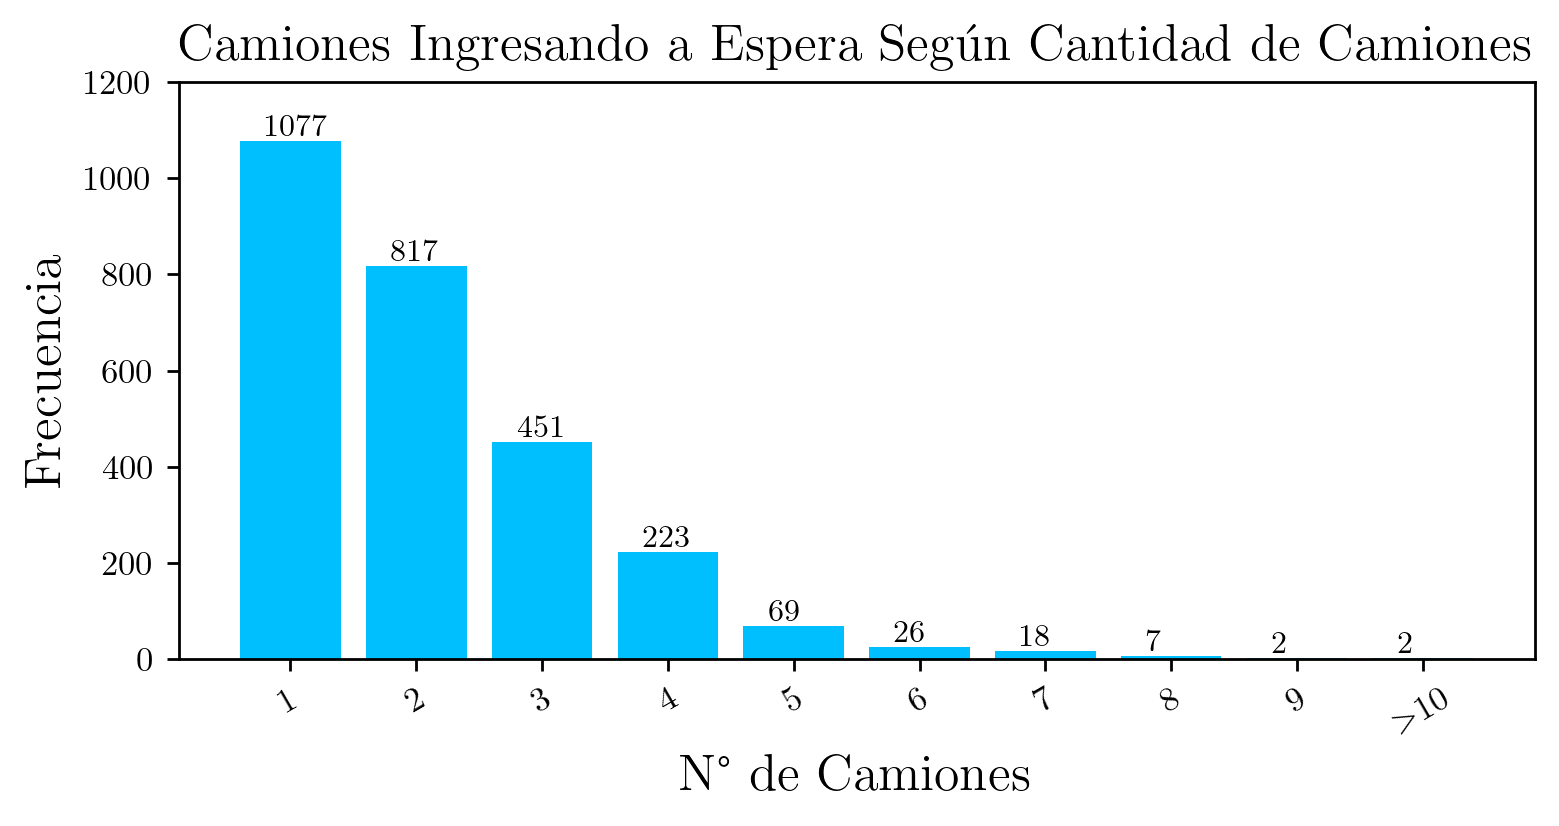

In [151]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(b[1:-1], h[1:], color = "deepskyblue" )
ax2.set_title("Camiones Ingresando a Espera Según Cantidad de Camiones", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

                 
ax2.set_xlabel("N° de Camiones", fontsize = 15)
ax2.set_ylim([0,1200])

ax2.set_xticks(b[1:-1])
ax2.set_xticklabels(idx_str, rotation = 30, fontsize = 10, fontdict = {"horizontalalignment": "center"})
                    
for i, label in enumerate(h):
    if (label != 0) & (label < 1500) :
        plt.annotate(str(round(label)), (i-0.2, label+10.5), 
                     fontsize = 9, rotation = 0)

plt.savefig("Graficos/Camiones Ingresando a Espera Según Cantidad de Camiones.png", bbox_inches= "tight")

In [153]:
en_cola = []
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_puerto):
        a = df_espera[(df_espera["Fecha de Ingreso a Puerto"] == valj) &
                    (df_espera["Rango Horario en Puerto"] == vali)].shape[0]
        
        en_cola.append(a)

In [154]:
Bins = [i for i in range(11)] + [100]

h, b = np.histogram(en_cola, bins=Bins)

In [155]:
idx = np.arange(1, len(b[1:-1])+1)
idx_str = [i for i in idx[:-1]] + ["$>$10"]

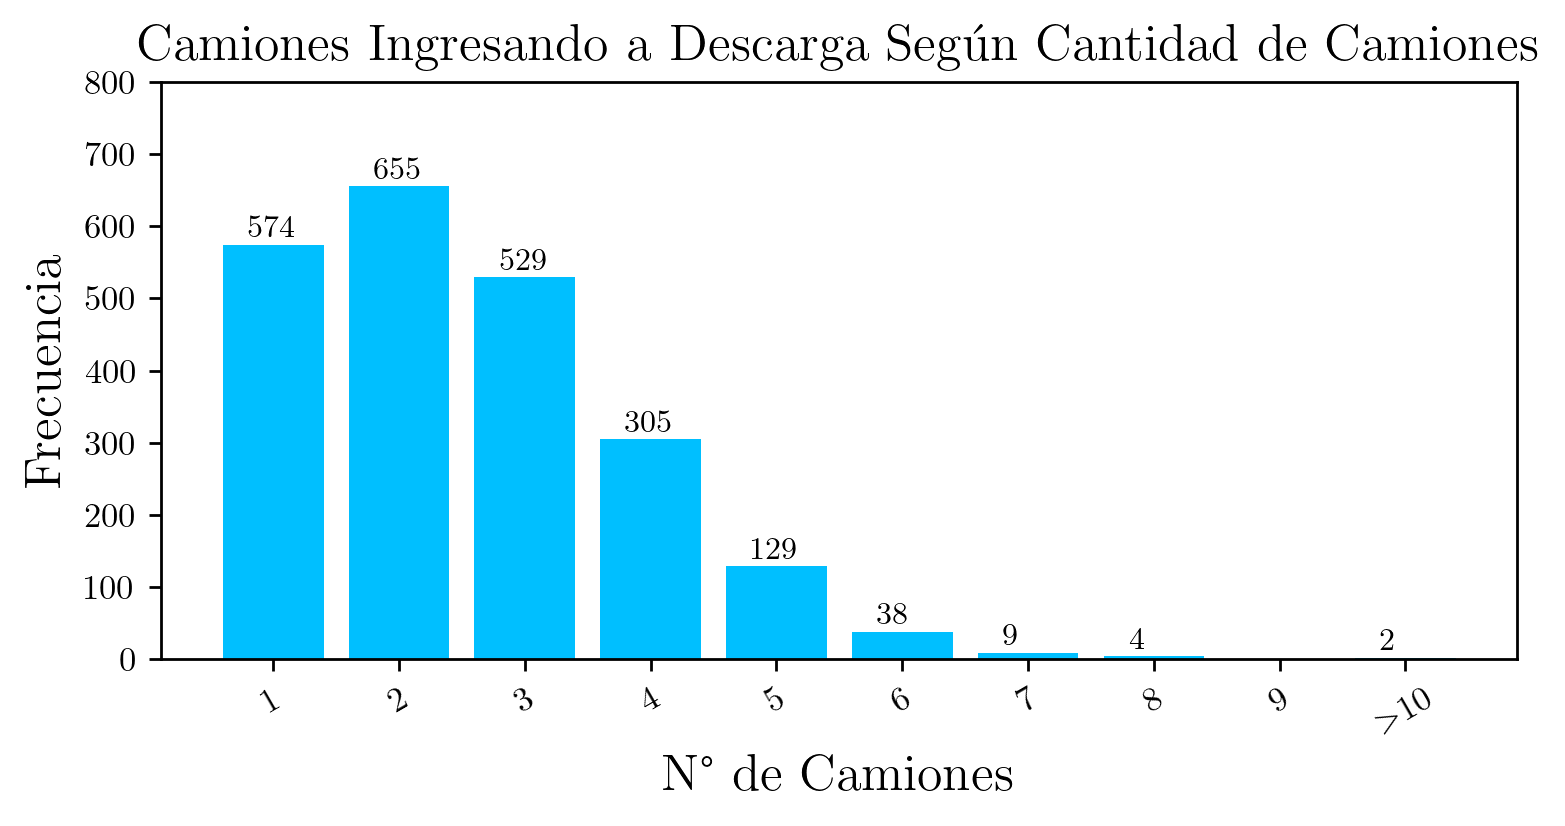

In [158]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(b[1:-1], h[1:], color = "deepskyblue" )
ax2.set_title("Camiones Ingresando a Descarga Según Cantidad de Camiones", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

                 
ax2.set_xlabel("N° de Camiones", fontsize = 15)
ax2.set_ylim([0,800])

ax2.set_xticks(b[1:-1])
ax2.set_xticklabels(idx_str, rotation = 30, fontsize = 10, fontdict = {"horizontalalignment": "center"})
                    
for i, label in enumerate(h):
    if (label != 0) & (label < 1500) :
        plt.annotate(str(round(label)), (i-0.2, label+10.5), 
                     fontsize = 9, rotation = 0)

plt.savefig("Graficos/Camiones Ingresando a Descarga Según Cantidad de Camiones.png", bbox_inches= "tight")

### Cálculos Esperas Limpias Sobre 60 min

In [130]:
N_esp_2020 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2020)].shape[0]
N_esp_2021 = df_clean[(df_clean["Tiempo Espera Limpio"]>60) & (df_clean["Año de Espera"]==2021)].shape[0]
N_esp_2020, N_esp_2021

(2376, 889)

In [131]:
N_esp_2020 + N_esp_2021

3265

In [132]:
N_clean_2020 = df_clean[(df_clean["Año de Espera"]==2020)].shape[0]
N_clean_2021 = df_clean[(df_clean["Año de Espera"]==2021)].shape[0]
N_clean_2020, N_clean_2021, N_clean_2020 + N_clean_2021

(4536, 1143, 5679)

In [133]:
N_clean = df_clean.shape[0]
N_clean

5679

In [134]:
100*N_esp_2020/N_clean_2020

52.38095238095238

In [135]:
100*N_esp_2021/N_clean_2021

77.77777777777777

In [136]:
100*(N_esp_2020 + N_esp_2021)/N_clean

57.49251628807889

In [137]:
df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)

<ipython-input-137-8c5caf00567a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Espera Sobre 60 min"] = df_clean["Tiempo Espera Limpio"].apply(lambda x: x-60 if x-60>0 else 0)


In [138]:
T_perdido_2020 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2020].sum()/60.
T_perdido_2021 = df_clean["Minutos Espera Sobre 60 min"][df_clean["Año de Espera"]==2021].sum()/60.
T_perdido_2020, T_perdido_2021, T_perdido_2020 + T_perdido_2021

(11545.164166665947, 4179.807222221489, 15724.971388887436)

<AxesSubplot:>

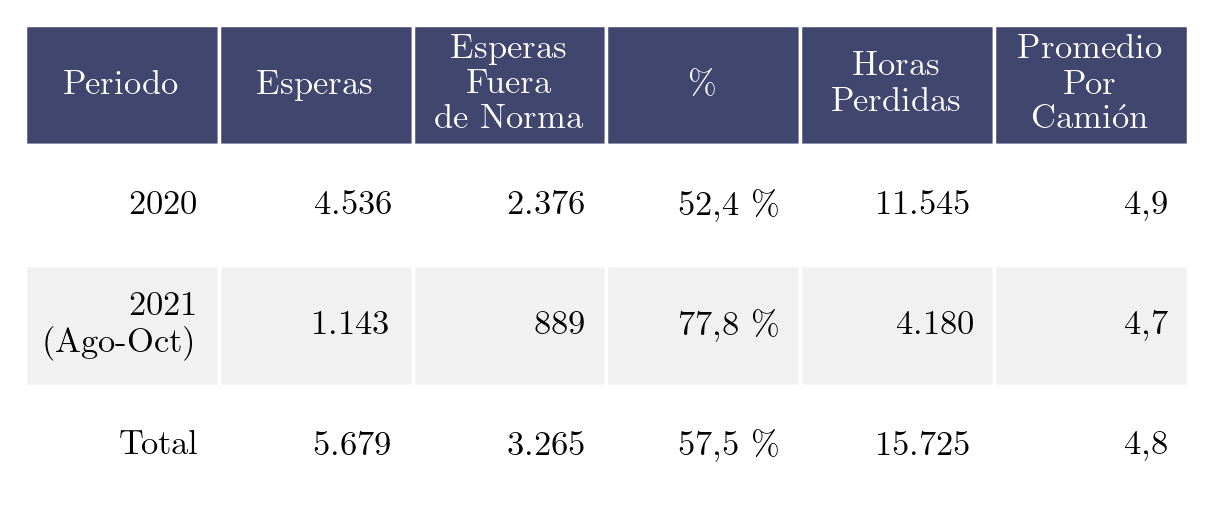

In [160]:
import six

tabla = pd.DataFrame()
tabla['Periodo'] = ['2020', '2021 \n (Ago-Oct)', 'Total']
tabla['Esperas'] = ["4.536", "1.143", "5.679"]
tabla['Esperas \n Fuera \n de Norma'] = ["2.376", "889", "3.265"]
tabla['\%'] = ["52,4 \%", "77,8 \%", "57,5 \%"]
tabla['Horas \n Perdidas'] = ["11.545", "4.180", "15.725"]
tabla['Promedio \n Por \n Camión'] = ["4,9", "4,7", "4,8"]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], Edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, image=False,**kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size, dpi = 250)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(Edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    if image==True:        
        plt.savefig("Graficos/Tabla de Esperas Limpias.png", bbox_inches= "tight")
    return ax

render_mpl_table(tabla, header_columns=0, col_width=1.0, image=True)

### Calculo Espera Total Sobre 75 min

In [139]:
df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]

<ipython-input-139-e428ee2fef3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Tiempo Total"] = df_clean["Tiempo Espera Limpio"] + df_clean["Tiempo Total en Puerto"]


In [140]:
N_sobre_75 = df_clean[df_clean["Tiempo Total"]>75].shape[0]

In [141]:
N_total = df_clean.shape[0]

In [142]:
N_total, N_sobre_75, N_total-N_sobre_75

(5679, 4714, 965)

In [143]:
100*N_sobre_75/N_total

83.00757175559077

In [144]:
df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)

<ipython-input-144-ba0f06e28dd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Minutos Totales Sobre 75 min"] = df_clean["Tiempo Total"].apply(lambda x: x-75 if x-75>0 else 0)


In [209]:
df_clean["Minutos Totales Sobre 75 min"].sum()/(60.*9*365*2)

3.3775774987314033

In [210]:
5679/(365*2)

7.779452054794521

In [203]:
df_clean["Minutos Totales Sobre 75 min"][df_clean["Minutos Totales Sobre 75 min"]!=0].sum()/60.

22190.684166665316

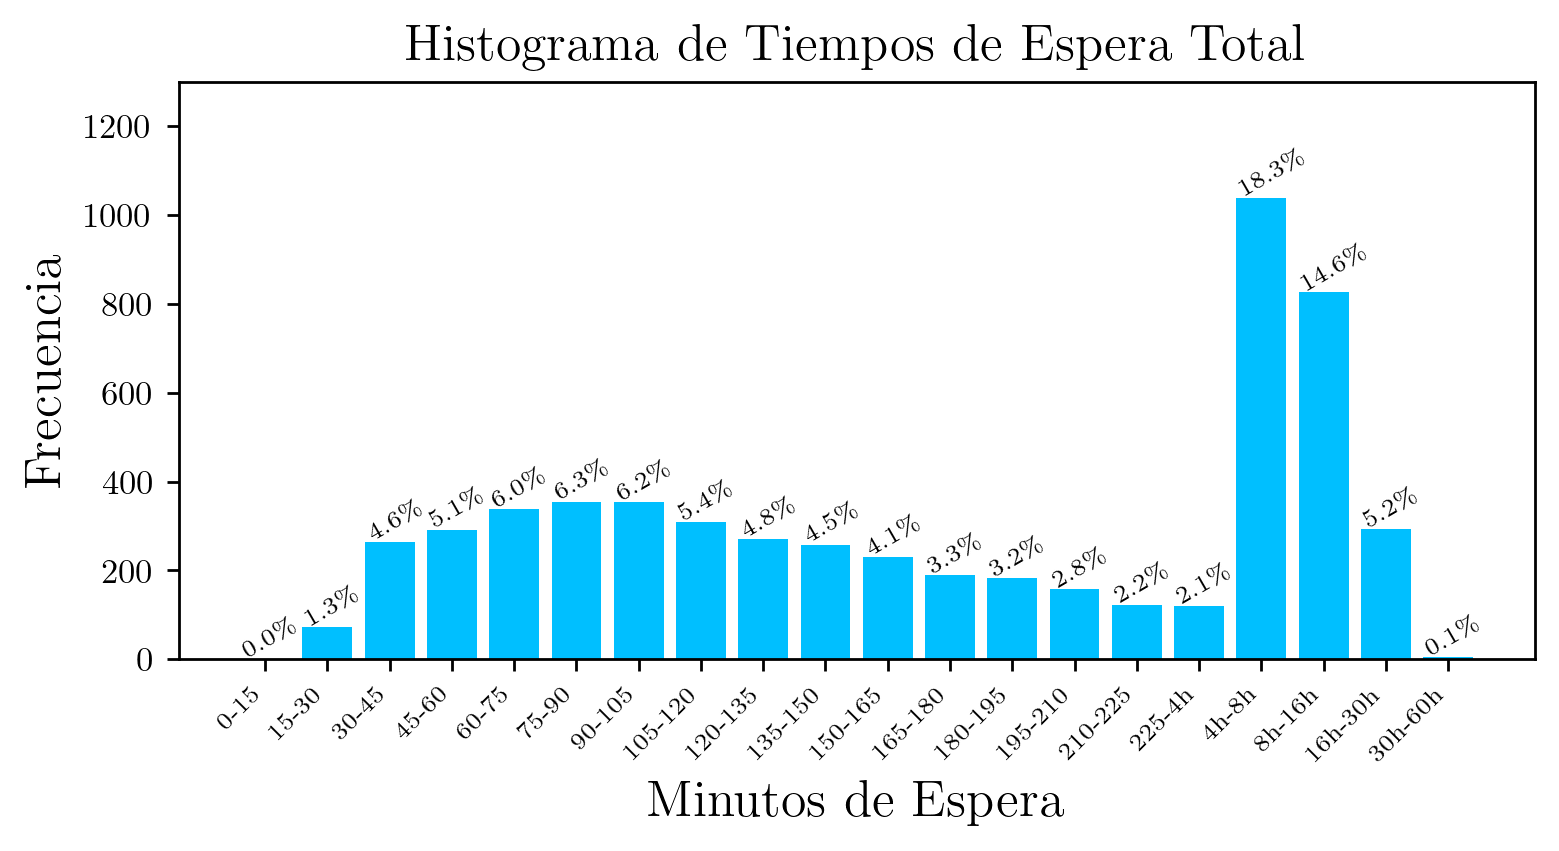

In [199]:
T_total = df_clean["Tiempo Total"]

Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(15*118)
Bins.append(30*118)
h, b = np.histogram(T_total, bins=Bins)


bins = []
for i in range(len(b[:-6])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-30h", "30h-60h"])


fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera Total", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,1300])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

#plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

In [185]:
Bins

[0,
 15,
 30,
 45,
 60,
 75,
 90,
 105,
 120,
 135,
 150,
 165,
 180,
 195,
 210,
 225,
 240,
 480,
 960,
 1770,
 3540]

5679